# AEROSP 536 Electric Propulsion: Homework 5
Jason Chen

---

## Problem 1: Hall Thruster Performance
Consider the following metrics for a Hall thruster:
| Parameter                      | Symbol       | Value       |
|--------------------------------|--------------|-------------|
| Discharge voltage              | $V_d$        | 300 V       |
| Discharge current              | $I_d$        | 20 A        |
| Mass flow rate                 | $\dot{m}$    | 21.0402 mg/s|
| Cathode voltage                | $V_c$        | 20 V        |
| Magnet power                   | $P_{mag}$    | 31.2 W      |
| Beam current                   | $I_b$        | 15 A        |
| Divergence half-angle          | $\theta$     | 15°         |
| Charge utilization efficiency  | $\eta_q$     | 1.0         |

### Part (a)
Calculate the efficiency of the thruster, assuming charge utilization efficiency of 1.

The overall efficiency of a hall thruster:
$$
\eta = \eta_m \eta_D \eta_q \eta_B \eta_V \eta_e
$$
where:
- $\eta_e$ is the electrical efficiency, i.e. how much of the total power is used for discharge (the main plasma circuit, an electric field generated between the hollow cathode and anode). It is given by, assuming no heater power since it is not given:
$$
\eta_e = \frac{V_d I_d}{V_d I_d + P_{mag}} = \frac{(300 \textrm{ V})(20 \textrm{ A})}{(300 \textrm{ V})(20 \textrm{ A}) + (31.2 \textrm{ W})}
$$
- $\eta_V$ is the voltage utilization efficiency, representing how much of the discharge voltage is effective at actually accelerating ions. It exists because there is a potential difference between the cathode and the plasma beam. The information we utilize is the given cathode voltage:
$$
\eta_V = \frac{V_d - V_c}{V_d}
$$
- $\eta_B$ is the beam utilization, representing the fraction of the supplied current from the anode that converts into accelerated ions:
$$
\eta_B = \frac{I_b}{I_d}
$$
- $\eta_q$ is the charge utilization, which accounts for the fact that the ion beam is at multiple charge states.
- $\eta_D$ is the divergence efficiency, representing losses due to ions being expelled with off-axial momentum:
$$
\eta_D  = (\cos{\theta})^2
$$
- $\eta_m$ is the mass utilization, representing how much of the propellant (neutral gas) is converted to ions, useful for thrust. The derivation involves control volume analysis but we get:
$$
\eta_m \approx \left( \frac{I_b}{q} \right) \frac{\sigma_{cs}}{u_n} \left( \frac{L_{ch}}{A_{ch}} \right)^\Gamma
$$
where $\sigma_{cs}$ is the ionization cross section, $u_n$ is the neutral velocity, $L_{ch}$ is the length of the channel, $A_{ch}$ is the cross sectional area of the channel, and $\Gamma \approx \theta \sqrt{\frac{m_i}{m_e} 0.05}$. In our case, since we do not know the geometry of the thruster, we can instead compare the mass flow rate of ions to neutrals. We know the beam current $I_b$ is carried by ions flowing out of the thruster, and by definition:
$$
I \equiv \frac{dQ}{dt}
$$
which is charge per second. So if $N$ is the number of ions per second, the current is $I_b = Ne$ where $e$ is the elementary charge. Thus to get $\dot{m}_{ion}$, we just need to multiply by the molar mass of an ion $M_{ion}$:
$$
\dot{m}_{ion} = \frac{I_b}{q} M_{ion}
$$
The molar mass of a Xenon ion is its atomic mass minus a single electon mass. So:
$$
\eta_m = \frac{\dot{m}_{ion}}{\dot{m}}
$$

Putting it all together, **we get overall $\eta = 63\%$**. The calculation done in Python is shown below.

In [33]:
import numpy as np

V_d = 300               # Discharge voltage [V]
I_d = 20                # Discharge current [A]
m_dot = 21.0402e-6      # Mass flow rate [kg/s] (converted from mg/s)
V_c = 20                # Cathode voltage [V]
P_mag = 31.2            # Magnet power [W]
I_b = 15                # Beam current [A]
theta = np.radians(15)  # Divergence half-angle [rad]
eta_q = 1.0             # Charge utilization efficiency [-]

q = 1.602e-19           # Elementary charge [C]
m_xe = 131.293          # Xenon atomic mass [amu]
m_e = 0.000548          # Electron mass [amu]
amu = 1.66054e-27       # Atomic mass unit [kg]
m_i = (m_xe-m_e) * amu  # Xenon ion mass [kg]
g_0 = 9.81              # Standard gravity [m/s^2]

eta_e = (V_d * I_d) / (V_d * I_d + P_mag)
print(f"Efficiency, electrical: {eta_e:.3f}")
eta_v = (V_d - V_c) / V_d
print(f"Efficiency, voltage: {eta_v:.3f}")
eta_b = I_b / I_d
print(f"Efficiency, beam: {eta_b:.3f}")
print(f"Efficiency, charge utilization: {eta_q:.3f}")
eta_d = np.cos(theta)**2
print(f"Efficiency, divergence: {eta_d:.3f}")
mdot_ion = ((I_b/q) * (m_xe - m_e) * amu)
eta_m = mdot_ion / m_dot
print(f"Efficiency, mass utilization: {eta_m:.3f}")
eta_total = eta_e * eta_v * eta_b * eta_q * eta_d * eta_m
print(f"Efficiency, total: {eta_total * 100:.1f}%")


Efficiency, electrical: 0.995
Efficiency, voltage: 0.933
Efficiency, beam: 0.750
Efficiency, charge utilization: 1.000
Efficiency, divergence: 0.933
Efficiency, mass utilization: 0.970
Efficiency, total: 63.0%


### Part (b)

The thrust generated from a Hall thruster can be derived by the kinetic energy of the ions exiting the thruster, which is related to the beam potential:
$$
\frac{1}{2}m_i u_e^2 = Z (V_d - V_c)
$$
Let $Z$ (the charge state) equal to $q$ since we are assuming 100% charge utilization. This is also assuming that $\langle V_B \rangle = V_d - V_c$, i.e. all ions form before being accelerated completely by the beam potential. Solving for $u_e$ and plugging into the thrust equation accounting for efficiency losses:
$$
T = \dot{m} I_{sp} g_0 = \dot{m}_{ion} \cos{\theta_D} \eta_m \eta_q \sqrt{\frac{2 q (V_d - V_c)}{m_i}}
$$

In [34]:
thrust = mdot_ion * np.cos(theta) * eta_m * eta_q * np.sqrt(2 * q * (V_d - V_c) / m_i)
thrust = np.sqrt(2 * eta_total * m_dot * (V_d * I_d + P_mag))
print(f"Thrust: {thrust:.3f} N")

Thrust: 0.400 N


### Part (c)

We're asked to account for the fact that test chambers on the ground that are used to characterize EP systems cannot pull a true vacuum, and thus overinflates the mass utilization efficiency when ambient gas ingresses into the ionization section of a thruster. We start by finding the mass flow rate of the ambient gas into the chamber using the formula provided:
$$
\dot{m}_{amb} = \frac{1}{4} m_n n_n v_n A
$$
where $m_n n_n$ is just the gas density, $v_n$ can be approximated to be the thermal velocity of the neutral gas, and $A$ is a known cross sectional area of the channel. Since the ambient gas is at very low pressure and reasonable temperatures, a callorically perfect gas (CPG) assumption is valid here, so we will use a CPG equation of state to find the ambient density:
$$
m_n n_n = \rho = \frac{p}{RT}
$$
The thermal velocity (mean of velocity magnitude in 3D) is:
$$
v_n = \sqrt{\frac{8 k_B T}{\pi m}}
$$
Now that we have $\dot{m}_{amb}$, we can adjust the mass utilization efficiency calculation. What we calculated before for mass utilization is derived from the beam current, which we can assume was backed out from an erosion rate measured with a Faraday cup or similar ion-catching device downstream of the Hall thruster during ground tests. This means the $I_b$ given in the table is the "apparent" $I_b$, and so the $\dot{m}_{ion}$ calculated from this in actuality also includes $\dot{m}_{amb}$. Thus we can find the actual $\dot{m}_{ion}$ on the ground using $I_b$ and $\dot{m}_{amb}$:
$$
\dot{m}_{ion} + \dot{m}_{amb} = \frac{I_b}{q} M_{ion}
$$
So, to calculate the thrust in space, we just use a new $\eta_m$ using only this $\dot{m}_{ion}$ we found above.

In [35]:
R_u = 8.314
k_b = 1.38e-23

torr_to_pa = 133.322
p_a = 1e-5 * torr_to_pa
T_a = 300
A = 0.02  # Channel area [m]
rho_a = p_a/((R_u/(m_xe/1e3)) * T_a)
v_n = np.sqrt((8 * k_b * T_a) / (np.pi * m_xe * amu))
mdot_a = 1/4 * rho_a * v_n * A
print(f"Ambient mass flow rate: {mdot_a*1e6:.3f} mg/s")
mdot_ion_true = ((I_b/q) * (m_xe - m_e) * amu) - mdot_a
eta_m_space = mdot_ion_true / m_dot
print(f"Mass utilization efficiency on ground: {eta_m:.3f}")
print(f"Mass utilization efficiency in space: {eta_m_space:.3f}")
T = mdot_ion_true * np.cos(theta) * eta_m_space * eta_q * np.sqrt(2 * q * (V_d - V_c) / m_i)

# Get new total efficiency in space
eta_total_space = eta_e * eta_v * eta_b * eta_q * eta_d * eta_m_space
T = np.sqrt(2 * eta_total_space * mdot_ion_true * (V_d * I_d + P_mag))
print(f"Thrust in space: {T:.3f} N")


Ambient mass flow rate: 0.077 mg/s
Mass utilization efficiency on ground: 0.970
Mass utilization efficiency in space: 0.967
Thrust in space: 0.392 N


**This gives a difference of around $8 \textrm{ mN}$.** Note that this assumes the amount of gas actually ionized is the same proportionally to both mass flow rates, and that $\eta_b$ is constant since both $I_b$ and $I_d$ are affected proportionally with respect to the changing mass flow rate.

### Part (d)

If we operate at the same discharge current in space (instead of the same internal Xenon mass flow rate), it means the efficiency that changes in space will be the $\eta_b$ instead of the $\eta_m$. This means we will proceed by carrying over the newly calculated (true) $\dot{m}_{ion}$ and converting it to an effective $I_b$ that would be in space, and deduct from thrust using the new $\eta_b$. To account for the beam utilization efficiency in thrust, we will use the classical total efficiency relation:
$$
\eta = \frac{1}{2} \left( \frac{T^2}{\dot{m}} \right) \frac{1}{P_{in}}
$$
$$
T = \sqrt{2 \eta \dot{m} P_{in}}
$$

In [36]:
I_b_true = q * mdot_ion_true/((m_xe - m_e) * amu)
eta_b_space = I_b_true / I_d
print(f"Beam efficiency in space: {eta_b_space:.3f}")
print(f"Beam efficiency on ground: {eta_b:.3f}")
eta_space = eta_e * eta_v * eta_b_space * eta_q * eta_d * eta_m
T = np.sqrt(2 * eta_space * mdot_ion_true * (V_d * I_d + P_mag))
print(f"Thrust in space: {T:.3f} N")

Beam efficiency in space: 0.747
Beam efficiency on ground: 0.750
Thrust in space: 0.392 N


As expected, the thrust calculated here is the same as the one found in Part (c).

## Problem 2: Hall Thruster Design
Assumptions:
- Propellant gas is xenon
- Optimal ion current density in the channel is $j = 100 \frac{\mathrm{mA}}{\mathrm{cm}^{2}}$
- Ratio of channel width to mean thruster diameter is constant $b/d = 0.2$
- Ratio of ionization mean free path to channel length is constant $\lambda_{\mathrm{iz}}/L = c_{\mathrm{iz}}$
- Ratio of electron Larmor radius to channel width is constant $r_{ce}/b = c_{B}$
- Ionization cross section $\sigma_{\mathrm{iz}}$ is constant
- Ions are singly charged and thruster efficiency is $1$
- Electron temperature is uniform and scales with discharge voltage $T_e = 0.1 V_0$
- Neutrals have inlet temperature $T = 800,\mathrm{K}$ and move with the thermal speed

### Part (a)
#### (i)
Given that we have 100% ionization efficiency, the ion current density must be equal to the neutral flux:
$$
j = q n_n v_n
$$
Solving for $n_n$:

In [37]:
from pint import UnitRegistry
ureg = UnitRegistry(auto_reduce_dimensions=True)
Q_ = ureg.Quantity

j = Q_(100, 'mA')/Q_(1, 'cm^2')
q = Q_(1.6022e-19, 'C')
k_b = Q_(1.3807e-23, 'J/K')
m_xe = Q_(131.293, 'amu')
T_n = Q_(800, 'K')
g_0 = Q_(9.81, 'm/s^2')

v_n = np.sqrt((8 * k_b * T_n) / (np.pi * m_xe))
n_n = j / (q * v_n)
print(f"Neutral density: {n_n.m_as('1/m^3'):.3e} 1/m^3")

Neutral density: 1.738e+19 1/m^3


#### (ii)
The density of ambient air is $1.225 \textrm{ kg/m}^3$, and we can convert this to a molar density by getting the average molar mass of air assuming 21% oxygen and 79% nitrogen by mass.

In [38]:
rho_air = Q_(1.225, 'kg/m^3')
o2_mass_fraction = 0.21
n2_mass_fraction = 0.79
M_o2 = Q_(32.0, 'g/mol')
M_n2 = Q_(28.0, 'g/mol')
# Calculate average molar mass of air
M_avg = (o2_mass_fraction * M_o2 + n2_mass_fraction * M_n2)
molar_density = rho_air / M_avg
avogadro = Q_(6.022e23, '1/mol')
n_n_air = molar_density * avogadro
print(f"Molar density of air: {n_n_air.m_as('1/m^3'):.2e} 1/m^3")
print(f"Ratio of number densities: {(n_n/n_n_air).m_as(''):.2e}")

Molar density of air: 2.56e+25 1/m^3
Ratio of number densities: 6.79e-07


#### (iii)
There is an optimal neutral density because there is an optimal ion density (here we have a 1:1 ratio because of 100% ionization). There is an optimal ion density because high density reduces the mean free path length and therefore results in more ionization, but too high of a density and there are chances for interactions between ions and between ions and neutrals; essentially it is the same as an equilibrium combustion assumption in chemical systems, where the ions are formed quickly and travel through the channel for the rest of the time. In this case, it may result in energy losses with additional interactions and collisions.

### Part (b)

Given a specific impulse requirement of 2000 seconds and various thrust requirements, finding the mean diameter $d$ involves the following procedure:
1. Finding the required neutral mass flow rate through the following equation. Because of 100% ionization, the ion mass flow rate is equal to the neutral mass flow rate:
$$
\dot{m} = \frac{F}{I_{sp} g_0}
$$
2. The area of the channel required to support this mass flow rate using the continuity equation:
$$
\dot{m} = m_n n_n v_n A_{channel}
$$
3. Area of the channel is related to the mean diameter through $A_{channel} = \pi bd$. We know $b = 0.2 d$ from the problem statement.

In [39]:
isp_req = Q_(2000, 's')
thrusts = [Q_(30, 'mN'), Q_(300, 'mN'), Q_(1, 'N')]
for t in thrusts:
    mdot_req = t / (isp_req * g_0)
    A_channel = mdot_req / (m_xe * n_n * v_n)
    d = np.sqrt(A_channel / (np.pi * 0.2))
    print(f"For thrust {t.m_as('mN'):.1f} mN, channel mean diameter: {d.m_as('cm'):.2f} cm")

For thrust 30.0 mN, channel mean diameter: 4.23 cm
For thrust 300.0 mN, channel mean diameter: 13.37 cm
For thrust 1000.0 mN, channel mean diameter: 24.42 cm


### Part (c)

Given the ionization cross section $\sigma_iz$, we can find the channel length $L$ assuming a uniform distribution of ionization probability axially.
$$
\lambda_{mfp} = \frac{1}{n_n \sigma_{iz}}
$$
The key insight is that because a neutral atom has an equal chance of ionizing along L, we know that $c_{iz} = 1/2$ since the mean length a neutral travels will be halfway through the channel given a uniform axial distribution. Rearranging:
$$
\frac{\lambda_{mfp}}{L} = \frac{1}{n_n \sigma_{iz} L} = c_{iz} = \frac{1}{2}
$$
$$
L = \frac{2}{n_n \sigma_{iz}}
$$

In [40]:
sigma_iz = Q_(5e-20, 'm^2')
L = 2/(n_n * sigma_iz)
print(f"Channel length: {L.m_as('cm'):.2f} cm")

Channel length: 230.20 cm


### Part (d)
Repeating the above but with Krypton:

In [41]:
m_kr = Q_(83.798, 'amu')
v_n_kr = np.sqrt((8 * k_b * T_n) / (np.pi * m_kr))
n_n_kr = j / (q * v_n_kr)
print(f"Krypton neutral density: {n_n_kr.m_as('1/m^3'):.3e} 1/m^3")
L = 2/(n_n_kr * sigma_iz)
print(f"Krypton channel length: {L.m_as('cm'):.2f} cm")


Krypton neutral density: 1.388e+19 1/m^3
Krypton channel length: 288.14 cm


The channel length is longer simply because the neutral density to smaller, meaning that we need a longer channel length (assuming the same distribution and still requiring 100% ionization) to achieve the same ionization.

### Part (e)

We know the magnetic field strength at a given specific impulse from the problem statement, and assuming a constant thrust, we want to find the magnetic field strength $B$ at different $I_{sp}$.

First, we'll use the constant Larmor radius to channel width from the problem statement:
$$
\frac{r_{ce}}{b} = c_B
$$
The equation for electron Larmor radius:
$$
r_{ce} = \frac{m_e v_e}{q B}
$$
where $v_e$ is the thermal velocity of an electron, which depends on electron temperature:
$$
v_e = \sqrt{\frac{k_B T_e}{m_e}}
$$
and since we know from the problem statement that $T_e = 0.1 V_0$, we know that as a scaling law (ignoring constants):
$$
v_e \propto \sqrt{V_0}
$$
and so:
$$
r_{ce} \propto \frac{\sqrt{V_0}}{B}
$$

Next, we can look at relating thrust to the discharge voltage. From previous derivation, we know we can relate $\dot{m}_{ion}$ to beam current through:
$$
\dot{m}_{ion} = \frac{I_b m_i}{e}
$$
and that exhaust velocity can be derived from kinetic energy and related to $V_0$ (assuming 100% of discharge potential is used):
$$
\frac{1}{2} m_i u_e^2 = q V_0
$$
Putting the previous two equations together through the thrust equation, we get:
$$
T = I_b \sqrt{\frac{2 m_i V_0}{q}}
$$

Since from the problem statement we can assume **thrust is constant**, we can rearrange this to get a scaling law for $I_b$:
$$
I_b \propto \frac{1}{\sqrt{V_0}} \propto V_0^{-1/2}
$$
And we saw before that by definition of $j$ (which is also constant):
$$
I_b = jA \propto d^2
$$
And so we can combine the two equations to relate $b$ (since it is directly proportional to $b$ by a constant of 0.2) to $V_0$:
$$
d^2 \propto I_b \propto V_0^{-1/2}
$$
$$
b \propto V_0^{-1/4}
$$

Finally, putting everything together:
$$
r_{ce} \propto \frac{\sqrt{V_0}}{B}
$$
$$
b \propto V_0^{-1/4}
$$
And since $r_{ce}/b$ is constant:
$$
\frac{r_{ce}}{b} \propto \frac{\frac{\sqrt{V_0}}{B}}{V_0^{-1/4}} \propto \frac{V_0^{3/4}}{B} = \textrm{ constant}
$$
$$
\boxed{B \propto V_0^{3/4}}
$$
Plugging in $I_{sp}$ from the $u_e = I_{sp}g_0$ and the relation of kinetic energy to discharge voltage, we get:
$$
B \propto I_{sp}^{3/2}
$$
And so we can relate magnetic field strengths to specific impulse through:
$$
\boxed{\frac{B_2}{B_1} = \left( \frac{I_{sp,2}}{I_{sp,1}} \right)^{3/2}}
$$

In [42]:
isp_1 = 2000
B_1 = 200
isp_i = 1500
isp_ii = 3000
B_i = B_1 * (isp_i/isp_1)**(3/2)
B_ii = B_1 * (isp_ii/isp_1)**(3/2)
print(f"Magnetic field for Isp = {isp_i} s: {B_i:.1f} G")
print(f"Magnetic field for Isp = {isp_ii} s: {B_ii:.1f} G")

Magnetic field for Isp = 1500 s: 129.9 G
Magnetic field for Isp = 3000 s: 367.4 G


## Problem 3

### Part (a)
Looking at generalized Ohm's law which is an equation of motion for electrons:
$$
\nabla_{\parallel} P_e + q n_e \nabla_{\parallel} \phi = -m_e \nu_c n_e v_e
$$
We're asked to show that the collisional term (RHS) can be neglected given that $\lambda_c / L_{Pe} \gg 1$ and thus can be reduced to the Boltzmann equation:
$$
\nabla_{\parallel} P_e + q n_e \nabla_{\parallel} \phi = 0
$$

To recall, in Ohm's law, the first term is the gradient along a magnetic field line (equipotential line) of the electron pressure $P_e$, the second term represents the electric force on electrons, and the term on the RHS represents collisional/drag forces on electrons. Thus to show that the RHS equals to zero, we just need to show that the motion is dominated by forces on the LHS such that the RHS is negligable.

Firstly, the expression for gradient length scale:
$$
L_{Pe} = \frac{P_e}{|\nabla_{\parallel} P_e|}
$$
And using the ideal gas law for electrons:
$$
P_e = n_e k_B T_e
$$
We can now combine to get the magnitude of the pressure gradient (force):
$$
|\nabla_{\parallel} P_e| = \frac{n_e k_B T_e}{L_{Pe}}
$$


Now looking at the collisional term on the RHS, we know from the problem statement that the electron drift is approximately thermal and therefore:
$$
v_e \approx v_{e, \textrm{thermal}} = \sqrt{\frac{k_B T_e}{m_e}}
$$
By definition, the mean free path length is:
$$
\lambda_{mfp} = \frac{v_{e, \textrm{thermal}}}{\nu_e}
$$
So we can get the magnitude of the RHS:
$$
m_e \nu_c n_e v_e = \frac{v_{e, \textrm{thermal}}}{\lambda_{mfp}} m_e n_e v_e = m_e n_e \frac{v_{e, \textrm{thermal}}^2}{\lambda_{mfp}} = \frac{n_e k_B T_e}{\lambda_{mfp}}
$$
Comparing the two magnitudes:
$$
\boxed{\frac{n_e k_B T_e}{L_{Pe}} \textrm{ v.s. } \frac{n_e k_B T_e}{\lambda_{mfp}}}
$$
We can now see that since we're told that $\frac{\lambda_{mfp}}{L_{Pe}} \gg 1$, the RHS in magnitude is $\ll$ than the LHS. **Thus the collisional term can be neglected.**

### Part (b)

We're tasked with designing a magnetically-shielded Hall thruster geometry. Looking at the channel, near the centerline we have high electron density $n_{cl}$ and low electron density near the channel walls $n_{wall}$. We know from the problem statement that they differ by three orders of magnitude, so $n_{cl}/n_{wall} = 10^3$. We also know the potential of the grazing line at the centerline is 300 V, and we want ot find the electron temperature $T_e$ on the grazing line such that the potential change along centerline is $< 5\%$. 

We can start with the Boltzmann equation from Part (a) and apply the ideal gas law (also stated above) to get:
$$
\nabla_{\parallel} P_e = \nabla_{\parallel} (n_e k_B T_e)
$$
We know from lecture that along each field line $T_e$ is approximately constant because of high electron mobility along the field lines = high heat conduction. This means we can take it out of the gradient:
$$
\nabla_{\parallel} P_e = k_B T_e \nabla_{\parallel} (n_e)
$$
Plugging into the Boltzmann relation and rearranging:
$$
0 = \nabla_{\parallel} P_e + q n_e \nabla_{\parallel} \phi = k_B T_e \frac{\nabla_{\parallel} (n_e)}{n_e} = q \nabla_{\parallel} (\phi)
$$
From lecture we ran into a similar term and can recognize the logarithmic derivative (for a gradient):
$$
\frac{\nabla_{\parallel} (n_e)}{n_e} = \nabla (\ln{n_e})
$$
This allows us to integrate along a field line (line integral) from a point on the centerline (1) to a point on the wall (2):
$$
k_B T_e \int_{1}^{2} \nabla_{\parallel} (\ln n_e)\, d\ell
=
q \int_{1}^{2} \nabla_{\parallel} \phi\, d\ell
$$
$$
k_B T_e \ln{\left(\frac{n_{wall}}{n_{cl}}\right)} = q \Delta \phi
$$
$$
\boxed{T_e = \frac{q \Delta \phi}{k_B} / \ln{\left(\frac{n_{wall}}{n_{cl}}\right)}}
$$

In [43]:
delta_phi = Q_(300, 'V') * 0.05
n_wall_n_cl = 1e-3
T_e = -(q * delta_phi / k_b) / np.log(n_wall_n_cl)
print(f"Electron temperature on grazing line: {T_e.m_as('K'):.2f} K")

Electron temperature on grazing line: 25198.33 K


## Problem 4

### Part (a)
The specific impulse can be easily derived from kinetic energy and exhaust velocity:
$$
I_{sp} = \frac{u_e}{g_0}
$$
$$
\frac{1}{2}m_i u_e^2 = q (V_d)
$$
$$
u_e = \sqrt{\frac{2 q V_d}{m_i}}
$$
$$
\boxed{I_{sp} = \frac{1}{g_0}\sqrt{\frac{2 q V_d}{m_i}}}
$$

### Part (b)

From the classic thrust equation:
$$
T = \dot{m} u_e
$$
We also know the expression for ionization rate from lecture:
$$
R_{\text{iz}} = n_n n_e \langle \sigma_{\text{iz}} u_e \rangle
$$
Since from the problem we can assume a constant ionization cross section and the electrons are at their thermal velocity:
$$
u_e = \sqrt{\frac{8 k_B T_e}{\pi m_e}}
$$
The rate becomes:
$$
R_{\text{iz}} = n_n n_e \sigma_{\text{iz}} \sqrt{\frac{8 k_B T_e}{\pi m_e}}
$$


To convert this ion production rate to a mass flow rate, we can include the volume of the chamber:
$$
V = A_{ch} I_{iz}
$$
And multiply by the mass (density) of an ion $m_i$ to get the ion mass flow rate:
$$
\dot{m}_{ion} = m_i n_e n_n \sigma_{\text{iz}} \sqrt{\frac{8 k_B T_e}{\pi m_e}} A_{ch} I_{iz}
$$
$$
T = m_i n_e n_n \sigma_{\text{iz}} \sqrt{\frac{8 k_B T_e}{\pi m_e}} A_{ch} I_{iz} u_e
$$
We know from the definition of electron current density $j$:
$$
j = \frac{I_b}{A} = q n_e u_e
$$
$$
u_e = \frac{j}{q n_e}
$$
So substituting in:
$$
\boxed{T = m_i n_n \frac{j}{q} \sqrt{\frac{8 k_B T_e}{\pi m_e}} \sigma_{\text{iz}} A_{ch} I_{iz}}
$$

### Part (c)

Deriving beam utilization efficiency $\eta_b$:
$$
\eta_b = \frac{I_b}{I_d}
$$
From the thrust equation, multiplying both sides by $q/m_i$ and then dividing by $u_e$:
$$
T \frac{q}{m_i} = n_n j \sqrt{\frac{8 k_B T_e}{\pi m_e}} \sigma_{\text{iz}} A_{ch} I_{iz}
$$
$$
\frac{T}{u_e} \frac{q}{m_i} = \frac{n_n j \sqrt{\frac{8 k_B T_e}{\pi m_e}} \sigma_{\text{iz}} A_{ch} I_{iz}}{I_{sp}g_0}
$$

From the definition of current (derived in a previous problem from $I = \dot{Q}$):
$$
I_b = \frac{\dot{m}_{ion} q}{m_i}
$$
We can recognize that the LHS of the thrust equation above is just $I_b$ since $T = \dot{m}_{ion} u_e$. Thus:
$$
I_b = \frac{n_n j \sqrt{\frac{8 k_B T_e}{\pi m_e}} \sigma_{\text{iz}} A_{ch} I_{iz}}{I_{sp}g_0}
$$
And so:
$$
\boxed{\eta_b = \frac{n_n j \sqrt{\frac{8 k_B T_e}{\pi m_e}} \sigma_{\text{iz}} A_{ch} I_{iz}}{I_d I_{sp}g_0}}
$$

### Part (d)

We want to find $I_{sp}$, $F$, and $\eta_b$ as scaling laws relative to Xenon with Xenon being at 1.0. Starting with earlier derivations, we already know:
$$
I_{sp} \propto \frac{1}{\sqrt{m_i}}
$$
Using the thrust equation from above and since $u_e \propto 1/\sqrt{m_i}$:
$$
T \propto \sigma_{iz} \sqrt{m_i}
$$
Beam utilization:
$$
\eta_b \propto \frac{\sigma_{iz}}{I_{sp}} \propto \sigma_{iz} \sqrt{m_i}
$$

In [44]:
propellants = {
    'xenon': {
        'm_i': Q_(131.3, 'amu'),
        'sigma_iz': Q_(5e-20, 'm^2')
    },
    'mercury': {
        'm_i': Q_(200.6, 'amu'),
        'sigma_iz': Q_(7e-21, 'm^2')
    },
    'bismuth': {
        'm_i': Q_(209, 'amu'),
        'sigma_iz': Q_(1e-19, 'm^2')
    }
}

# Reference values (Xenon)
m_xe = propellants['xenon']['m_i']
sigma_xe = propellants['xenon']['sigma_iz']
results = {}

for name, props in propellants.items():
    m_i = props['m_i']
    sigma_iz = props['sigma_iz']
    # Isp scales as 1/sqrt(m_i)
    isp_scaled = np.sqrt(m_xe / m_i).magnitude
    # Thrust scales as sqrt(m_i) * sigma_iz
    T_scaled = (np.sqrt(m_i / m_xe) * (sigma_iz / sigma_xe)).magnitude
    # Beam utilization scales as sigma_iz / Isp = sigma_iz * sqrt(m_i)
    eta_b_scaled = ((sigma_iz / sigma_xe) / isp_scaled).magnitude
    results[name] = {
        'isp_scaled': isp_scaled,
        'T_scaled': T_scaled,
        'eta_b_scaled': eta_b_scaled
    }

print("=" * 65)
print(f"{'Gas':<10} {'Isp/Isp_Xe':<15} {'T/T_Xe':<15} {'η_b/η_b_Xe':<15}")
print("=" * 65)
for name, res in results.items():
    print(f"{name:<10} {res['isp_scaled']:<15.3f} {res['T_scaled']:<15.3f} {res['eta_b_scaled']:<15.3f}")
print("=" * 65)

Gas        Isp/Isp_Xe      T/T_Xe          η_b/η_b_Xe     
xenon      1.000           1.000           1.000          
mercury    0.809           0.173           0.173          
bismuth    0.793           2.523           2.523          


### Part (e)

The ideal propellant is one that has a large ionization cross section while still being light. Given constant input power this would maximize all the above performance metrics, however this is generally not possible to achieve. As we've learned generally from this class, maximizing specific impulse by having the lightest exhaust species is not always optimal in EP systems due to engineering considerations (e.g. heavy power systems).

Xenon is typically the propellant of choice due to a combination of performance and engineering variables. Noble gases are generally preferable for the lifetime of stage and engine systems, and it is the heaviest noble gas, meaning it can achieve the highest thrust density (smaller engine packaging) and beam utilization has seen above. Mass utilization scales linearly with $m_i$ instead of by $\sqrt{m_i}$, so the efficiency gain of Xenon is very decent. It is also very dense and a gas at room temperature, meaning a lot of mass can be carried in a small volume. The Szabo paper also mentions that its ionization energy is lower, which means for a given electron mean free path, it will lose less energy (and therefore stay in the channel longer) when colliding with Xenon. The largest drawback of Xenon is generally just its high monetary cost.

## Problem 5

### Part (a)
To solve this problem, we just need to plug in the necessary variables to solve the given equation, and take its inverse:
$$
\omega_{pe} = \sqrt{\frac{q^2 n_e}{m_e \varepsilon_0}}
$$

In [45]:
m_e = Q_(9.109e-31, 'kg')
eps_0 = Q_(8.854e-12, 'F/m')
n_e = Q_(5e17, '1/m^3')

# Plasma frequency and timestep
omega_pe = np.sqrt(q**2 * n_e / (m_e * eps_0)).to('rad/s')
dt = (1 / omega_pe).to('ps')

print(f"omega_pe = {omega_pe:.3e}")
print(f"dt <= 1/omega_pe = {dt:.2f}")

omega_pe = 3.989e+10 radian / second
dt <= 1/omega_pe = 25.07 picosecond


### Part (b)

This is a simple calculation, we just need to know how many timesteps are required for a full kinetic assumption given the timestep side we found above:

In [46]:
t_sim = Q_(1, 'ms')
n_steps = (t_sim / dt).to_reduced_units()
print(f"Number of timesteps: {n_steps.magnitude:.2e}")

Number of timesteps: 3.99e+07


We can see that 40 million timesteps is prohibitively expensive for simulating a hall thruster, especially considering this is only for 1 ms of operation, while if we wanted to model a full mission, we may need the simulation to run for years.

### Part (c)

In cylindrical coordinates, we want to solve for the axial component ($\hat{z}$) of the gradient of the electrostatic potential, i.e. $\frac{\partial \phi}{\partial z}$.

Starting with generalized Ohm's law:
$$
\frac{m_e \nu_e}{e}\vec{j}_e = \nabla P_e - en_e\nabla\phi - \vec{j}_e \times \vec{B}
$$

We can expand the cross product on the rightmost term (Lorentz force):
$$
\vec{j}_e \times \vec{B} = (j_{e,r}\hat{r} + j_{e,\theta}\hat{\theta} + j_{e,z}\hat{z}) \times (B_r\hat{r})
$$
This is because we're told that the magnetic field is purely radial. Using unit vector cross products (e.g. $\hat{r} \times \hat{r} = 0$):
$$
\vec{j}_e \times \vec{B} = j_{e,z}B_r\hat{\theta} - j_{e,\theta}B_r\hat{z}
$$

Next looking at the electrostatic potential term, through the definition of gradient:
$$
\nabla\phi = \frac{\partial\phi}{\partial r}\hat{r} + \frac{1}{r}\frac{\partial\phi}{\partial\theta}\hat{\theta} + \frac{\partial\phi}{\partial z}\hat{z}
$$
Same for pressure:
$$
\nabla P_e = \frac{\partial P_e}{\partial r}\hat{r} + \frac{1}{r}\frac{\partial P_e}{\partial\theta}\hat{\theta} + \frac{\partial P_e}{\partial z}\hat{z}
$$

We can now just look at all the axial $\hat{z}$ terms in Ohm's law (LHS is trivial, $j_{e,z}$ is the axial component of $j_e$):
$$
\frac{m_e \nu_e}{e}j_{e,z} = \frac{\partial P_e}{\partial z} - en_e\frac{\partial\phi}{\partial z} + j_{e,\theta}B_r
$$
$$
\boxed{\frac{\partial\phi}{\partial z} = \frac{1}{e n_e} \left(\frac{\partial P_e}{\partial z} + j_{e,\theta}B_r - \frac{m_e \nu_e}{e}j_{e,z}\right)}
$$

### Part (d)

In the data that is given, we are only given as a function of axial position $z$: electron number density $n_e$, electron temperature $T_e$, electron-neutral collision frequency $f_{en}$, electron-ion collision frequency $f_{ei}$, ionization frequency $f_{iz}$, axial electron current density $j_{e,z}$, and field strength $B$. Thus we need to further re-express the above equation to make use of the data.

Starting with $P_e$, we once again use the idea gas law for electrons to expand the pressure partial:
$$
\frac{\partial P_e}{\partial z} = k_B T_e \frac{\partial n_e}{\partial z} + n_e k_B \frac{\partial T_e}{\partial z}
$$

For the resistive term, we know by definition $\nu_e = f_{en} + f_{ei}$:
$$
\frac{m_e \nu_e}{e}j_{e,z} = \frac{m_e (f_{en} + f_{ei})}{e}j_{e,z}
$$
To get $j_{e,\theta}$, we go back to generalized Ohm's law but instead solve for the $\hat{\theta}$ direction. We know that generally in a Hall thruster the pressure and electric potential are axissymmetric, so their partials with respect to $\theta$ are zero. Thus in $\hat{\theta}$:
$$
\frac{m_e \nu_e}{e} j_{e,\theta} = 0 - 0 - j_{e,z} B_r
$$
$$
j_{e,\theta} = -\frac{e B_r}{m_e \nu_e} j_{e,z} = -\frac{e B_r}{m_e (f_{en} + f_{ei})} j_{e,z}
$$

Putting it all together:
$$
\frac{\partial\phi}{\partial z} = \frac{1}{e n_e} \left[\left( k_B T_e \frac{\partial n_e}{\partial z} + n_e k_B \frac{\partial T_e}{\partial z} \right) - \left(\frac{e B_r}{m_e (f_{en} + f_{ei})} j_{e,z} \right)B_r - \frac{m_e \nu_e}{e}j_{e,z}\right]
$$
Distributing:
$$
\frac{\partial \phi}{\partial z}
= \frac{k_B T_e}{e n_e} \frac{\partial n_e}{\partial z} 
+ \frac{k_B}{e} \frac{\partial T_e}{\partial z}
- \frac{B_r^{2}}{m_e \nu_e n_e} j_{e,z}
- \frac{m_e \nu_e}{e^{2} n_e} j_{e,z}
$$
Factoring and simplifying, while also knowing that $T_e k_b / e$ in Kelvin is equal to just $T_e$ in electron volts:
$$
\frac{\partial \phi}{\partial z}
= \frac{T_e}{n_e} \frac{\partial n_e}{\partial z} 
+ \frac{k_B}{e} \frac{\partial T_e}{\partial z}
- \frac{j_{e,z}}{n_e} \left(\frac{B_r^{2}}{m_e \nu_e}
+ \frac{m_e \nu_e}{e^{2}} \right)
$$
$$
\boxed{
\frac{\partial \phi}{\partial z}
= \frac{T_e}{n_e} \frac{\partial n_e}{\partial z} 
+ \frac{k_B}{e} \frac{\partial T_e}{\partial z}
- \frac{m_e \nu_e}{e^2 n_e} (1 + \Omega_e^2) j_{e,z}
}
$$
where $\Omega_e = \frac{e B_r}{m_e \nu_e}$ is the Hall parameter. Since we have the derivative here and discrete data, we will integrate numerically using something like trapezoidal integration using Python. Note that the problem says the initial condition $z_0$ is at 300 V.

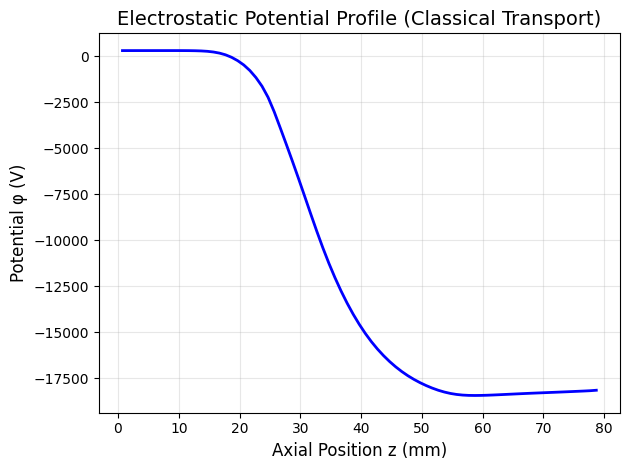

φ(z=0) = 300.0 V,  φ(z=end) = -18140.7 V,  Drop = 18440.7 V


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
from scipy.interpolate import interp1d

# Constants
m_e, e = 9.109e-31, 1.602e-19

# Load data
df = pd.read_csv('SPT100_Data.csv')
df.columns = df.columns.str.strip().str.replace('\ufeff', '')
df_B = pd.read_csv('SPT100_bfield.csv')

z = df['z(m)'].values
n_e = df['ne (1/m^3)'].values
T_e = df['Te (eV)'].values
nu_e = df['f_en (1/s)'].values + df['f_ei (1/s)'].values
j_ez = df['jez (A/m^2)'].values
B_r = interp1d(df_B['z_bfield (m)'], df_B['Br (T)'], fill_value='extrapolate')(z)

# Compute dphi/dz
omega_e = e * B_r / (m_e * nu_e)
pressure_term = T_e * np.gradient(np.log(n_e), z) + np.gradient(T_e, z)
resistive_hall_term = (m_e * nu_e / (e**2 * n_e)) * (1 + omega_e**2) * j_ez
dphi_dz = pressure_term - resistive_hall_term

# Integrate with boundary condition phi(anode) = 300 V
phi = 300.0 + cumulative_trapezoid(dphi_dz, z, initial=0)

# Plot
fig, ax = plt.subplots()
ax.plot(z * 1000, phi, 'b-', linewidth=2)
ax.set_xlabel('Axial Position z (mm)', fontsize=12)
ax.set_ylabel('Potential φ (V)', fontsize=12)
ax.set_title('Electrostatic Potential Profile (Classical Transport)', fontsize=14)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"φ(z=0) = {phi[0]:.1f} V,  φ(z=end) = {phi[-1]:.1f} V,  Drop = {phi[0]-phi[-1]:.1f} V")


The plot we get there is evidently not physical, but this is the whole problem of anomalous transport; given only classical theory of transport mechanisms, we overestimate the Hall term and therefore the gradient of the electric field is much greater than what it should be. A reasonable potential drop will be in the tens or hundreds of V, not thousands.

### Part (e)

In this problem, we're acknowledging that the predicted potential drop is aphysical, and so we try a different model for collision frequency which is a piecewise (2-zone) model. We want to solve for $c_1$ and $c_2$ now to get a potential drop of 250 V, instead of the 18 kV we found previously. Cyclotron frequency by definition:
$$
\omega_{ce} = \frac{e B_r}{m_e}
$$
What we can tune here to adjust the potential drop is the Hall parameter:
$$
\Omega_e = \frac{e B_r}{m_e \nu_e}
$$
Since $\nu_a = c \omega_{ce} =  c \frac{e B_r}{m_e}$:


$$
\Omega_e = \frac{e B_r m_e}{m_e e B_r c} = \frac{1}{c}
$$

So, we can substitute this into our gradient equation:
$$
\frac{\partial\phi}{\partial z} = \frac{T_e}{n_e} \frac{\partial n_e}{\partial z} + \frac{k_B}{e} \frac{\partial T_e}{\partial z} - \frac{c  B_r}{e  n_e}\left(1 + \frac{1}{c^2}\right)j_{e,z}
$$

Now when we set up the integration, we want $\phi (z_0) - \phi (z_{end}) = 250 \textrm{ V}$, which will require us to split it up into two integrals, one with $c_1$ and the other with $c_2$:
$$
\int_{z_0}^{z_{end}} \frac{\partial\phi}{\partial z} dz = \int_{z_0}^{z_{B,max}} \left.\frac{\partial\phi}{\partial z}\right|_{c_1} dz + \int_{z_{B,max}}^{z_{end}} \left.\frac{\partial\phi}{\partial z}\right|_{c_2} dz = -250 \text{ V}
$$

**Note** that in the code below, there likely is a way for me to turn this into an optimization problem and find the actual exact values of $c_1$ and $c_2$, but I decided to go with simpler code and to guess-and-check the resulting potential drops. The maximum stength of $B$ was also hardcoded since we know the dataset. The result I got was:
$$
\boxed{c_1 \approx 1/22\textrm{ , } c_2 \approx 1/34}
$$

c1 = 0.0455 (1/22), c2 = 0.0294 (1/34)
z_Bmax = 25.70 mm
Potential drop: 240.7 V


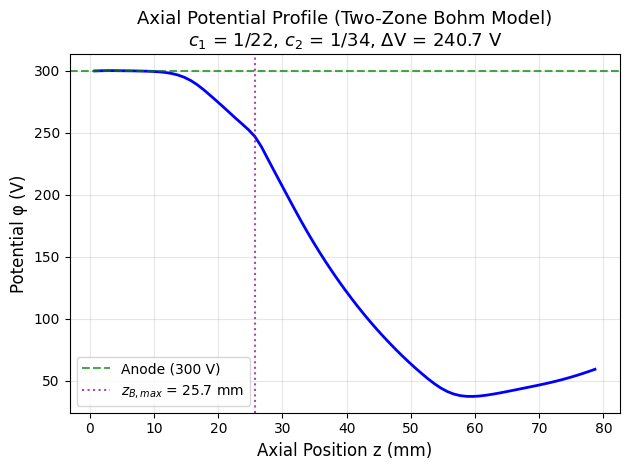

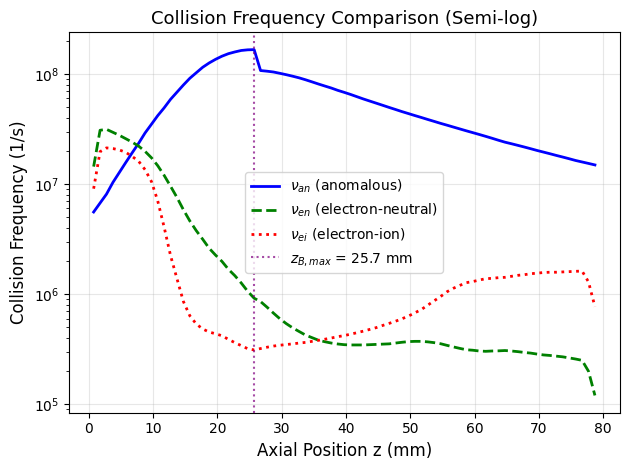

In [ ]:
z = df['z(m)'].values
n_e = df['ne (1/m^3)'].values
T_e = df['Te (eV)'].values
f_en = df['f_en (1/s)'].values
f_ei = df['f_ei (1/s)'].values
j_ez = df['jez (A/m^2)'].values
B_r = interp1d(df_B['z_bfield (m)'], df_B['Br (T)'], fill_value='extrapolate')(z)

omega_ce = e * B_r / m_e
z_Bmax = z[np.argmax(B_r)]
# Adjusted Bohm coefficients to achieve ~250 V drop
c1 = 1/22  # Upstream
c2 = 1/34  # Downstream

# Two-zone anomalous collision frequency
nu_an = np.where(z <= z_Bmax, c1 * omega_ce, c2 * omega_ce)
omega_e = omega_ce / nu_an
pressure_term = T_e * np.gradient(np.log(n_e), z) + np.gradient(T_e, z)
resistive_hall_term = (m_e * nu_an / (e**2 * n_e)) * (1 + omega_e**2) * j_ez
dphi_dz = pressure_term - resistive_hall_term
phi = 300.0 + cumulative_trapezoid(dphi_dz, z, initial=0)

print(f"z_Bmax = {z_Bmax*1000:.2f} mm")
print(f"Potential drop: {phi[0] - phi[-1]:.1f} V")

plt.figure()
plt.plot(z * 1000, phi, 'b-', linewidth=2)
plt.axhline(y=300, color='g', linestyle='--', alpha=0.7, label='Anode (300 V)')
plt.axvline(x=z_Bmax*1000, color='purple', linestyle=':', alpha=0.7, 
            label=f'$z_{{B,max}}$ = {z_Bmax*1000:.1f} mm')
plt.xlabel('Axial Position z (mm)', fontsize=12)
plt.ylabel('Potential φ (V)', fontsize=12)
plt.title(f'Axial Potential Profile (Two-Zone Bohm Model)\n$c_1$ = 1/{1/c1:.0f}, $c_2$ = 1/{1/c2:.0f}, ΔV = {phi[0]-phi[-1]:.1f} V', fontsize=13)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure()
plt.semilogy(z * 1000, nu_an, 'b-', linewidth=2, label=r'$\nu_{an}$ (anomalous)')
plt.semilogy(z * 1000, f_en, 'g--', linewidth=2, label=r'$\nu_{en}$ (electron-neutral)')
plt.semilogy(z * 1000, f_ei, 'r:', linewidth=2, label=r'$\nu_{ei}$ (electron-ion)')
plt.axvline(x=z_Bmax*1000, color='purple', linestyle=':', alpha=0.7, 
            label=f'$z_{{B,max}}$ = {z_Bmax*1000:.1f} mm')
plt.xlabel('Axial Position z (mm)', fontsize=12)
plt.ylabel('Collision Frequency (1/s)', fontsize=12)
plt.title('Collision Frequency Comparison (Semi-log)', fontsize=13)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Part (f)

No, $c_1$​ and $c_2$​ are not expected to be universal across different operating conditions. The anomalous transport arises from plasma instabilities (e.g., electron drift instability) whose characteristics depend on local plasma parameters including $\nabla n_e$ and $\nabla T_e$, all of which **change with discharge voltage and current.** Higher discharge voltage increases electron temperature ($T_e \propto V_d$), which modifies the dynamics and interactions at play. The Bohm coefficients are empirical in nature to fit what has been seen in testing, and are not based in fundamental physics and therefore cannot be generalized to other operating conditions.